## Titanic Dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
import pickle

from sklearn import datasets, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split

In [2]:
#Import dataset using Pandas
titanic_df = pd.read_csv('titanic.csv')

#Peak at the first 5 rows of data:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Analysis

In [3]:
#Look at overall chance of survival for any passenger by taking the mean number of survived columns
titanic_df['survived'].mean()

0.3819709702062643

In [4]:
#Get a view of each of their classes 
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1.0,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2.0,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3.0,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [5]:
#group by gender and class 
class_gender_grouping = titanic_df.groupby(['pclass', 'sex']).mean()

In [6]:
#make age ranges and group by age and draw a graph with mat lab
group_by_age = pd.cut(titanic_df['age'], np.arange(0,90,10)) # create groups 0-90 in intervals of 10

age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044,4.000000
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


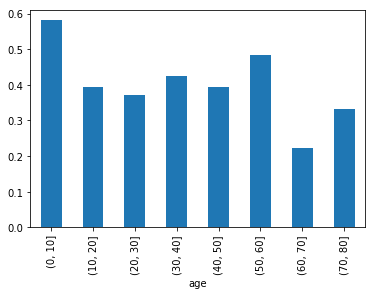

In [7]:
age_grouping['survived'].plot.bar()

### Preparing the Data

In [8]:
#Look at shape of data, 1310 rows with 14 "features"
titanic_df.shape

(1310, 14)

In [9]:
#Look at which columns have missing values
titanic_df.count().sort_values(ascending=False)

ticket       1309
parch        1309
sibsp        1309
sex          1309
name         1309
survived     1309
pclass       1309
fare         1308
embarked     1307
age          1046
home.dest     745
boat          486
cabin         295
body          121
dtype: int64

In [10]:
titanic_df = titanic_df.drop(['body', 'cabin', 'boat'], axis=1)
titanic_df = titanic_df.drop(['name', 'ticket', 'home.dest'], axis=1)

titanic_df = titanic_df.dropna()
titanic_df.count().sort_values(ascending=False)

embarked    1043
fare        1043
parch       1043
sibsp       1043
age         1043
sex         1043
survived    1043
pclass      1043
dtype: int64

#### Label encoding

Alternative to one hot encoding. We assign each value type to a number (0,1,2,3 etc).

In [11]:
#make copy of the dataframe
processed_titanic_df = titanic_df.copy()

le = preprocessing.LabelEncoder() #scikit leran - Encodes labels with value between 0 and n_classes-1.

#converting strings to integer values: 1 hot encoding
processed_titanic_df.embarked = le.fit_transform(processed_titanic_df.embarked)
embarked_classes = le.classes_
processed_titanic_df.sex = le.fit_transform(processed_titanic_df.sex)
sex_classes = le.classes_

In [12]:
processed_titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,2


In [13]:
#Split data into features and labels
x = processed_titanic_df.drop(['survived'], axis=1).values
y = processed_titanic_df['survived'].values

In [14]:
x.shape

(1043, 7)

In [15]:
x[0]

array([   1.    ,    0.    ,   29.    ,    0.    ,    0.    ,  211.3375,
          2.    ])

In [16]:
#Separate data into training and test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#separate training data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2)


In [17]:
x_train.shape #667 + 167 + 209

(667, 7)

In [18]:
y_train.shape

(667,)

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# 'c' in the line equation
lm.intercept_

1.3647098992920788

In [21]:
#weights / 'm ' in line equation
lm.coef_

array([ -1.67530569e-01,  -5.14406814e-01,  -4.96706501e-03,
        -5.15542275e-02,   6.95861934e-03,   1.65117016e-04,
        -6.65868220e-02])

In [22]:
len(lm.coef_)

7

In [23]:
#Create dataframe with features and coefficents
X_columns = processed_titanic_df.drop(['survived'], axis=1).columns
column_coef = pd.DataFrame(zip(X_columns, lm.coef_), columns= ["features", "coefs"])
column_coef.sort_values(by='coefs', ascending=False)

,features,coefs
4,parch,0.006959
5,fare,0.000165
2,age,-0.004967
3,sibsp,-0.051554
6,embarked,-0.066587
0,pclass,-0.167531
1,sex,-0.514407


In [24]:
sex_classes

array(['female', 'male'], dtype=object)

Highest positive coefficient is *parch* implying that as num of parents/child on board increase, the probability of surviving increases.

Sex is most negative - Female (0) and Male (1) so as sex increases (ie being Male) the probablity of surviving decreases the most


In [25]:
# do predictions on training data and test data
pred_train = lm.predict(x_train)
pred_val = lm.predict(x_val)

In [26]:
pred_train.shape

(667,)

In [27]:
pred_train[0]

0.73945579683819174

In [28]:
# convert predicitions into 0 and 1 with 0.5 boundary
pred_train2 = pred_train.copy()
pred_train2[pred_train2 > .5] = 1
pred_train2[pred_train2 <=.5] = 0
print(pred_train2[0])

1.0


In [29]:
#calculate mean squared error for train:
metrics.mean_squared_error(y_train, pred_train)

0.13889140804725358

In [30]:
#and val sets:
metrics.mean_squared_error(y_val, pred_val)

0.19536337180377145

### Decision Tree Classifier

In [31]:
decision_tree = tree.DecisionTreeClassifier(max_depth=7)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
pred_train_dt = decision_tree.predict(x_train)
pred_val_dt = decision_tree.predict(x_val)

In [33]:
pred_train.shape

(667,)

In [34]:
pred_train_dt[:5]

array([ 1.,  1.,  0.,  0.,  0.])

In [35]:
metrics.mean_squared_error(y_train, pred_train_dt)

0.1199400299850075

## Would you survive?

In [36]:
X_columns

Index([u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'embarked'], dtype='object')

In [37]:
sex_classes

array(['female', 'male'], dtype=object)

In [38]:
embarked_classes

array(['C', 'Q', 'S'], dtype=object)

In [39]:
me = [2, 0, 23, 1, 2, 70, 2]

In [40]:
decision_tree.predict([me])

array([ 1.])

## Save Model

In [41]:
# Saved the trained decision tree classifier with Pickle
dt_filename = 'titanic_survival_api/dt_titanic_model.pkl'

# Open the file to save as pkl file
dt_model = open(dt_filename, 'wb')
pickle.dump(decision_tree, dt_model)

# Close the pickle instances
dt_model.close()

In [42]:
dt_filename = 'titanic_survival_api/dt_titanic_model.pkl'
dt_model_file = open(dt_filename, 'rb')
dt_model_loaded = pickle.load(dt_model_file)

dt_model_loaded.predict([me])


array([ 1.])